# Introduction 

The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market.

For this project, we'll pretend that we're working as data analysts for a company that builds `iOS mobile apps`.

Our goal for this project is to analyze data to help our developers understand what type of apps are likely to attract more users.


## Read the Data 

In [1]:
# import the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
pd.options.display.max_columns = 999 
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
# read the data in pandas
games = pd.read_csv('../Data/appstore_games.csv')
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


## Explore and Clean Data 

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [4]:
# change the date columns to datatime object 
games['Original Release Date'] = pd.to_datetime(games['Original Release Date'])
games['Current Version Release Date'] = pd.to_datetime(games['Current Version Release Date'])
# create new data columns 
games['Release Date Month'] = games['Original Release Date'].dt.month
games['Release Date Year'] = games['Original Release Date'].dt.year

games['Version Month'] = games['Current Version Release Date'].dt.month
games['Version Year'] = games['Current Version Release Date'].dt.year

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 22 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [6]:
# Finding Missing Values 
games.isnull().sum()/ len(games)*100 

URL                             0.00
ID                              0.00
Name                            0.00
Subtitle                       69.07
Icon URL                        0.00
Average User Rating            55.54
User Rating Count              55.54
Price                           0.14
In-app Purchases               54.82
Description                     0.00
Developer                       0.00
Age Rating                      0.00
Languages                       0.35
Size                            0.01
Primary Genre                   0.00
Genres                          0.00
Original Release Date           0.00
Current Version Release Date    0.00
Release Date Month              0.00
Release Date Year               0.00
Version Month                   0.00
Version Year                    0.00
dtype: float64

In [7]:
games['In-app Purchases'].value_counts()

0.99                                                                       943
2.99                                                                       608
1.99                                                                       560
4.99                                                                       154
0.99, 0.99                                                                 140
3.99                                                                        83
1.99, 0.99                                                                  58
0.99, 0.99, 0.99                                                            51
0.99, 1.99                                                                  48
1.99, 1.99                                                                  38
9.99                                                                        34
0.99, 2.99                                                                  33
0.99, 1.99, 2.99                                    

We can see that there are 4 columns that have a very higher percentage of missing values. We will fill the missing values for the `Average User Rating` and `User Rating Count` by their mean. And for now we will keep the other two columns `In-app Purchases` and `Subtitle` as is it. We will handle them later.  

In [8]:
# fill the missing values with mean of the column
games['Average User Rating'].fillna(games['Average User Rating'].mean(), inplace=True)
games['User Rating Count'].fillna(games['User Rating Count'].mean(), inplace=True)

games.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating                 0
User Rating Count                   0
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
Release Date Month                  0
Release Date Year                   0
Version Month                       0
Version Year                        0
dtype: int64

In [9]:
# drop the missing values in the Languages, price and size column
games.dropna(subset=['Languages','Size','Price'], inplace=True)

In [10]:
games.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11699
Icon URL                            0
Average User Rating                 0
User Rating Count                   0
Price                               0
In-app Purchases                 9279
Description                         0
Developer                           0
Age Rating                          0
Languages                           0
Size                                0
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
Release Date Month                  0
Release Date Year                   0
Version Month                       0
Version Year                        0
dtype: int64

# Analysis

## What are the most common average user Rating?

In [11]:
games['Average User Rating'].value_counts(normalize=True)*100 

4.06   55.46
4.50   16.85
4.00   10.16
5.00    5.83
3.50    5.45
3.00    3.03
2.50    1.86
2.00    0.92
1.50    0.35
1.00    0.08
Name: Average User Rating, dtype: float64

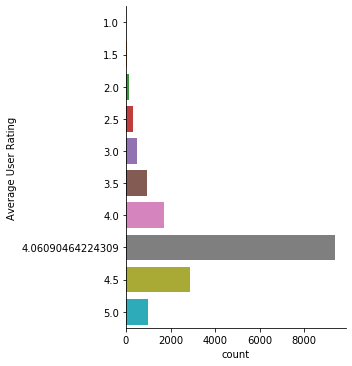

In [12]:
sns.catplot(y='Average User Rating',kind='count', data=games);

We can see that most common average user ratings are `4.5`,`4.06`,`4` and `5`, means most strategy games in the App 
store tends to get higher Ratings. 

## What is the average user rating counts? 

In [13]:
games['User Rating Count'].describe()

count     16923.00
mean       3310.36
std       28288.08
min           5.00
25%          65.00
50%        3306.53
75%        3306.53
max     3032734.00
Name: User Rating Count, dtype: float64

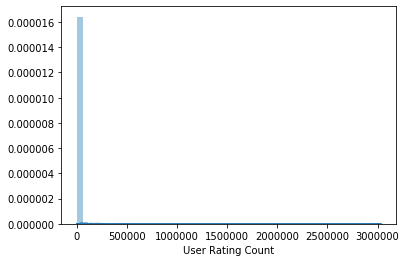

In [14]:
sns.distplot(games['User Rating Count']);

We can see that most of the Apps have a very low user rating counts.75% of the Apps have less than 3306 user rating counts and are apps which has more than million user rating counts. The differnece is too much big. 

# What are the most common Game Apps Genres? 

In [15]:
games['Genres'].value_counts()

Games, Strategy, Puzzle                              777
Games, Puzzle, Strategy                              692
Games, Strategy                                      579
Games, Strategy, Action                              482
Games, Simulation, Strategy                          462
Games, Strategy, Simulation                          456
Games, Action, Strategy                              420
Games, Strategy, Puzzle, Entertainment               356
Games, Puzzle, Strategy, Entertainment               342
Games, Strategy, Casual                              338
Games, Strategy, Entertainment, Puzzle               333
Games, Entertainment, Puzzle, Strategy               314
Games, Casual, Strategy                              308
Games, Board, Strategy                               302
Games, Strategy, Board                               294
Games, Entertainment, Strategy, Puzzle               291
Games, Puzzle, Entertainment, Strategy               283
Games, Role Playing, Strategy  

Here ,We can see that there are multiple genres in every rows and lots of data are repeated like 
`Games, Strategy, Puzzle` and `Games, Puzzle, Strategy`. Let's separate them out to find out how many times each Genre was mentioned. 

In [16]:
Genre_list = games['Genres'].str.split(',', expand=True)
Genre_list.head()

,0,1,2,3,4,5
0,Games,Strategy,Puzzle,None,None,None
1,Games,Strategy,Board,None,None,None
2,Games,Board,Strategy,None,None,None
3,Games,Strategy,Puzzle,None,None,None
4,Games,Strategy,Board,Education,None,None


In [17]:
# stack the data and count values 
Genre_list.stack().value_counts()

 Strategy                  16922
Games                      16207
 Entertainment              7763
 Puzzle                     3946
 Simulation                 2129
 Action                     2005
 Board                      1714
 Casual                     1689
 Role Playing               1116
 Adventure                   831
 Family                      772
 Education                   725
 Games                       716
 Sports                      677
 Card                        670
 Trivia                      287
Education                    221
 Lifestyle                   210
Entertainment                196
 Racing                      129
 Word                        125
 Social Networking           117
 Music                       108
 Utilities                    99
 Travel                       92
Utilities                     77
 Casino                       75
Sports                        59
 Food & Drink                 53
 Reference                    52
          

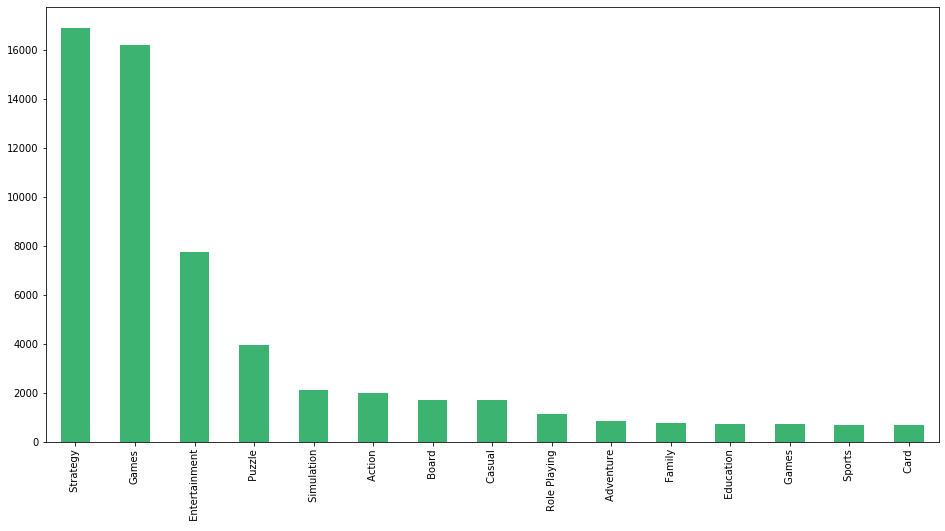

In [18]:
# plot the data 
Genre_list.stack().value_counts()[:15].plot.bar(figsize=(16,8), color='mediumseagreen');

As it is a Strategy Games Apps data so `Games` and `Strategy` seems obvious ones. Apart from them,some other popular categories are `Entertainment`, `Puzzle`. 

# What are the Top 20 Games? 

A common way to find it out is by looking at the user rating count, as the most popular games tends to have more 
rating counts. 

In [19]:
top_20_games = games[['Name','User Rating Count']].sort_values(by='User Rating Count', ascending=False)[:20]
top_20_games.set_index('Name', inplace=True)

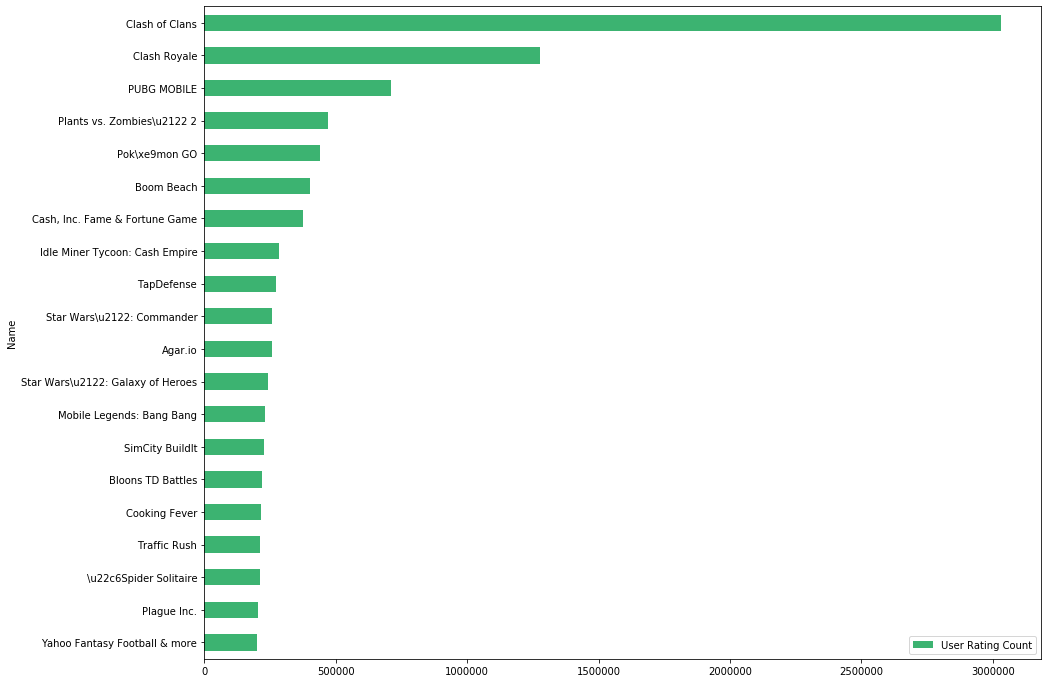

In [20]:
top_20_games.sort_values(by='User Rating Count').plot.barh(figsize=(15,12), color='mediumseagreen');

I was expecting `PUBG Mobile` to have more user rating counts but actually it is `Clash Of Clans`. Let's also look 
at their ratings in the App store to see if `PUBG Mobile` has higher average rating than `Clash Of Clans` or not?

In [21]:
games[games['Name'].isin(top_20_games.index)][['Name','Average User Rating']]

,Name,Average User Rating
38,TapDefense,3.50
129,Traffic Rush,3.50
155,Yahoo Fantasy Football & more,3.50
1023,\u22c6Spider Solitaire,4.50
1345,Plague Inc.,4.50
1378,Clash of Clans,4.50
1921,Plants vs. Zombies\u2122 2,4.50
2086,Bloons TD Battles,4.50
2410,Boom Beach,4.50
2675,Cooking Fever,4.50


Both these Games have an average rating of `4.5`. Infact most of the top 20 games have an average rating of `4.5`. 
Although `Cash, Inc. Fame & Fortune Game` have low user rating count but it has a perfect rating of 5. Some worst 
performing games based on user rating are `Pokemon Go`,`TapDefense`,`Traffic Rush`,`Yahoo Fantasy Football & more`. 


# Who are the Top 10 developers and What games have they built? 

In [22]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Release Date Month,Release Date Year,Version Month,Version Year
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,11,2008,5,2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,11,2008,5,2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,11,2008,5,2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,7,2008,5,2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,7,2008,7,2018


In [23]:
top_10_developers = games.pivot_table(index='Developer', values='User Rating Count', aggfunc='sum').sort_values(
    by='User Rating Count', ascending=False)[:10]
top_10_developers

,User Rating Count
Developer,
Supercell,4710616.00
Tencent Mobile International Limited,711409.00
Electronic Arts,593165.00
Ninja Kiwi,476661.00
PopCap,469562.00
Lion Studios,453471.00
"Niantic, Inc.",444110.00
Donut Games,428938.00
Glu Games Inc,406341.00


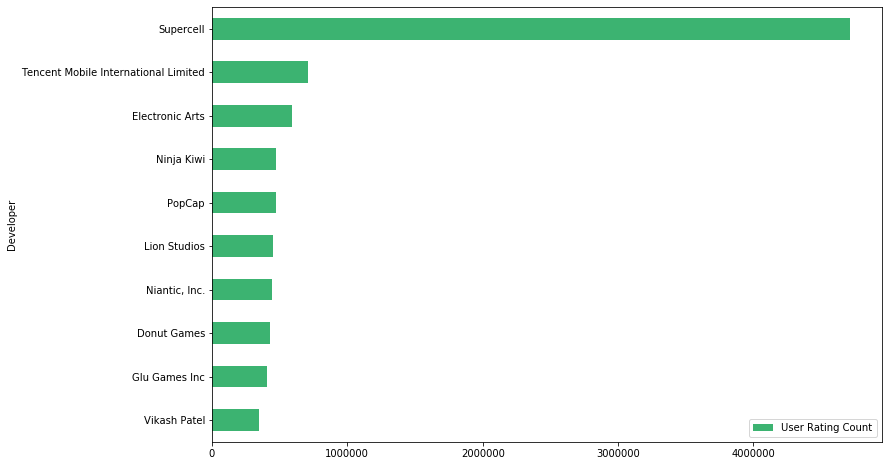

In [24]:
top_10_developers.sort_values(by='User Rating Count').plot.barh(
    figsize=(12,8), color='mediumseagreen');

In [25]:
# And What games they have built 
developer_games = games[games['Developer'].isin(top_10_developers.index)].pivot_table(
    index=['Developer','Name'], values='User Rating Count', aggfunc='sum')
developer_games.T

Developer                Donut Games                                          \
Name              Alice Greenfingers Castle Smasher Cows In Space Icy Escort   
User Rating Count            1979.00       12659.00      46861.00   47338.00   

Developer                                                        \
Name              Jungle Crash Land Titanic Rescue Traffic Rush   
User Rating Count          67670.00       38008.00    212763.00   

Developer                                            Electronic Arts  \
Name              Traffic Rush 2 Command & Conquer\u2122: Rivals PVP   
User Rating Count        1660.00                            27169.00   

Developer                                                               \
Name              Heroes of Dragon Age Plants vs. Zombies\u2122 Heroes   
User Rating Count             18060.00                        75459.00   

Developer                                                            \
Name              SimCity BuildIt Star Wars\u2122: Galaxy of Heroes   
User Rating Count       227214.00                         240990.00   

Developer                                                Glu Games Inc  \
Name              TETRIS\xae Premium for iPad "Alice's Teacup Madness"   
User Rating Count                     4273.00                  1081.00   

Developer                                                                     \
Name              Avenue Flo Avenue Flo: Special Delivery Cooking Dash\u2122   
User Rating Count    1915.00                      1213.00          101786.00   

Developer                                                                    \
Name              Defenders & Dragons DinerTown Pets Garden Dash Hotel Dash   
User Rating Count             1077.00        1721.00     1585.00   17551.00   

Developer                                                      \
Name              Hotel Dash Deluxe Hotel Dash: Lost Luxuries   
User Rating Count          36217.00                   3179.00   

Developer                                                                     \
Name              Hotel Dash: Suite Success Hotel Dash: Suite Success Deluxe   
User Rating Count                   1081.00                          1006.00   

Developer                                                                    \
Name              Restaurant DASH: Gordon Ramsay Samurai vs Zombies Defense   
User Rating Count                       91651.00                   23527.00   

Developer                                                               \
Name              Wedding Dash Wedding Dash 4-Ever Wedding Dash Deluxe   
User Rating Count    101209.00             3486.00            17056.00   

Developer                Lion Studios                                 \
Name              Ball Smasher \u2122 Cash, Inc. Fame & Fortune Game   
User Rating Count            60917.00                      374772.00   

Developer                      Niantic, Inc.                 Ninja Kiwi  \
Name              Idle Zombies Ingress Prime Pok\xe9mon GO Battle Panic   
User Rating Count     17782.00       4334.00     439776.00      1245.00   

Developer                                                               \
Name                Bloons Bloons Adventure Time TD Bloons Monkey City   
User Rating Count 16693.00                  8117.00           10639.00   

Developer                                                           \
Name              Bloons TD Bloons TD 4 Bloons TD 4 HD Bloons TD 5   
User Rating Count   7950.00     8409.00        2582.00    97776.00   

Developer                                                       \
Name              Bloons TD 5 HD Bloons TD 6 Bloons TD Battles   
User Rating Count       42652.00    46634.00         219230.00   

Developer                                                     \
Name              Cursed Treasure HD Cursed Treasure HD Lite   
User Rating Count             241.00                   33.00   

Developer                         

In [26]:
games[games['Developer'] == 'Vikash Patel']['Name']

8423                             Goal ! - Make a Goal
8448                              Ninja Claiming Rock
8449                   Drive All Cars - Traffic Sense
8564                                     Pals Popping
8565                             Extreme Atoms Puzzle
8566                               Turtle Twisty Goal
8567                                Blocks Run Puzzle
8568                             Boom - Blocks Puzzle
8569                             Space Okto Kids Game
8571                           Heart Calculation Step
8572                           Save Life To Fall Them
8573                  Match The Monster Blocks Puzzle
8574                  Match The Monster Blocks Puzzle
8575                  Blast The Blocks Match 3 Puzzle
8576                     Pick The Diamond Bunching Up
8775                               Dreams Of Symphony
8777                              Cave Perfect Driver
8778                        Last Deliver Baseball Bat
8779                        

In [27]:
# Is Vikash patel created any games which is in top 20 games
games[games['Developer'] == 'Vikash Patel']['Name'].isin(top_20_games.index).value_counts()

False    107
Name: Name, dtype: int64

**From the above analysis we can see that there are two approaches we can take to be in top 10 developers-** 
1. Either build very few top Notch games like `Supercell` and `Tencent` did with clash of clan & clash Royal by `Supercell` and PUBG by `Tencent`. 
2. Or Create lots of small medium size games like `Vikash Patel` did. He built 170 games and non of them are in the top 20 games in the App Store. 

# what are the most common Age Ratings? 

In [28]:
games['Age Rating'].value_counts()

4+     11762
9+      2464
12+     2041
17+      656
Name: Age Rating, dtype: int64

In [29]:
# what is the age ratings of the top 20 games 
games[games['Name'].isin(top_20_games.index)][['Name','Age Rating']]

,Name,Age Rating
38,TapDefense,9+
129,Traffic Rush,9+
155,Yahoo Fantasy Football & more,17+
1023,\u22c6Spider Solitaire,4+
1345,Plague Inc.,12+
1378,Clash of Clans,9+
1921,Plants vs. Zombies\u2122 2,9+
2086,Bloons TD Battles,9+
2410,Boom Beach,9+
2675,Cooking Fever,4+


Most of the Games have a Rating of `4+`, followed by a rating of `+9` and if we look at the top 20 games ratings,
we can see that most of them have a rating of `+9`. So a better strategy is to make a game which has a rating of 
`9+`. 

# Which languages are used more? 

In [30]:
games['Languages'].value_counts()

EN                                                                                                                                12449
EN, ZH                                                                                                                              352
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR                                                                      277
EN, ZH, ZH                                                                                                                          248
EN, DE                                                                                                                              147
EN, JA                                                                                                                              141
AR, CA, CS, DA, NL, EN, FI, FR, DE, EL, HE, HU, ID, IT, JA, KO, MS, NB, PL, PT, RO, RU, ZH, SK, ES, SV, TH, ZH, TR, UK, VI          125
CS, DA, NL, EN, FI, FR, DE, EL, HE, ID, IT, JA, 

In [31]:
language_list = games['Languages'].str.split(',', expand=True)
language_list.stack().value_counts()

EN     15186
 ZH     4694
 DE     2583
 FR     2503
 ES     2415
 JA     2348
 RU     2175
 IT     1992
 PT     1918
 KO     1911
 EN     1625
 TR     1351
 PL     1151
 SV     1125
 NL     1099
 TH      744
 ID      687
 NB      683
 FI      666
 DA      648
 EL      645
 VI      618
 MS      573
 HE      522
AR       499
CS       467
 HU      444
 RO      426
 CS      419
 SK      402
       ...  
 YI        2
PT         2
 TK        2
 KU        2
RU         2
BN         2
 MT        2
 JV        1
 XH        1
 SU        1
 IU        1
BE         1
 RN        1
 FO        1
ID         1
 TT        1
 GV        1
 TO        1
 GD        1
 BR        1
 QU        1
 GN        1
 RW        1
AZ         1
 TI        1
 MG        1
 MI        1
 UG        1
 AY        1
 DZ        1
Length: 139, dtype: int64

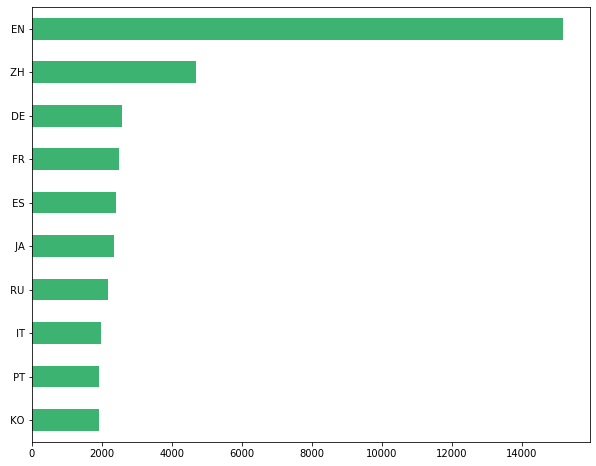

In [32]:
language_list.stack().value_counts()[:10].sort_values(ascending=True).plot.barh(
    figsize=(10,8), color='mediumseagreen');

Most of the Games are in `English` and `Chinese(ZH)` followed by `German(DE)`.

# What is the average price of games in the App Store? 

In [33]:
games['Price'].describe()

count   16923.00
mean        0.81
std         7.85
min         0.00
25%         0.00
50%         0.00
75%         0.00
max       179.99
Name: Price, dtype: float64

In [34]:
games['Price'].value_counts()

0.00      14163
0.99       1078
1.99        513
2.99        464
4.99        237
3.99        162
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
139.99        1
37.99         1
59.99         1
Name: Price, dtype: int64

In [35]:
# What are the price of top 20 games 
games[games['Name'].isin(top_20_games.index)][['Name','Price']]

,Name,Price
38,TapDefense,0.00
129,Traffic Rush,0.99
155,Yahoo Fantasy Football & more,0.00
1023,\u22c6Spider Solitaire,0.00
1345,Plague Inc.,0.99
1378,Clash of Clans,0.00
1921,Plants vs. Zombies\u2122 2,0.00
2086,Bloons TD Battles,0.00
2410,Boom Beach,0.00
2675,Cooking Fever,0.00


We can see that the average price of games in the App store is `81 cents` but if we look at the prices of all the `top 20 games`, we can see that most have a Price of `0 dollar`. Means that they make money by In-App Purchases`. So, letting the users download the games then making making through in-app purchases is a good strategy rather than charging them in the begining. 

# What common In-App Purchase Price are used most by developers? 

In [42]:
in_app_price_list = games['In-app Purchases'].str.split(',' , expand=True) 
in_app_price_list.stack().value_counts()[:10]

 0.99     5208
 4.99     3704
 1.99     3685
0.99      2848
 9.99     2776
 2.99     2385
 19.99    1724
1.99      1520
 3.99     1183
2.99      1124
dtype: int64

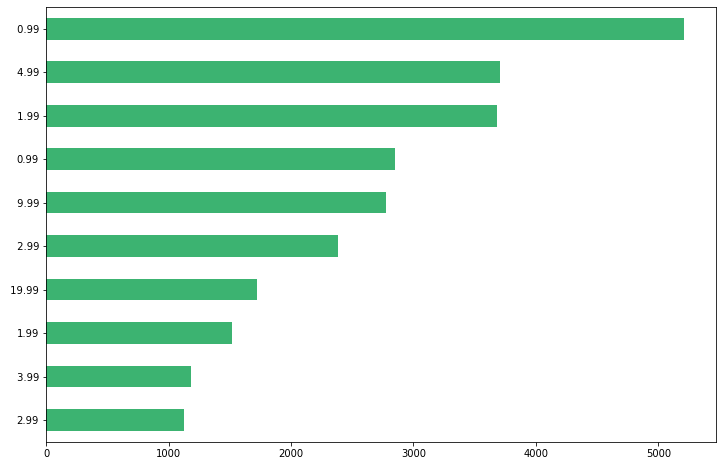

In [46]:
in_app_price_list.stack().value_counts()[:10].sort_values(ascending=True).plot.barh(
    figsize=(12,8), color='mediumseagreen');

We can see `some values are repeated` because of errors in typing. But Mostly developers use `0.99` or `1.99` followed by `4.99`. 

# Is there a Particular month when companies tends to release their Games more? 

In [36]:
games['Release Date Month'].value_counts()

7     1504
6     1497
4     1494
3     1473
12    1441
10    1411
5     1402
1     1364
9     1358
2     1340
11    1322
8     1317
Name: Release Date Month, dtype: int64

Although the highest number of games release in the July or in the summer but there isn't seems any particular pattern 
for releasing games based on month. 

In [37]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Release Date Month,Release Date Year,Version Month,Version Year
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,11,2008,5,2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,11,2008,5,2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,11,2008,5,2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,7,2008,5,2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,7,2008,7,2018


# Which words are used most often in Name and Subtitle columns? 

In [38]:
!pip install wordcloud
from wordcloud import WordCloud

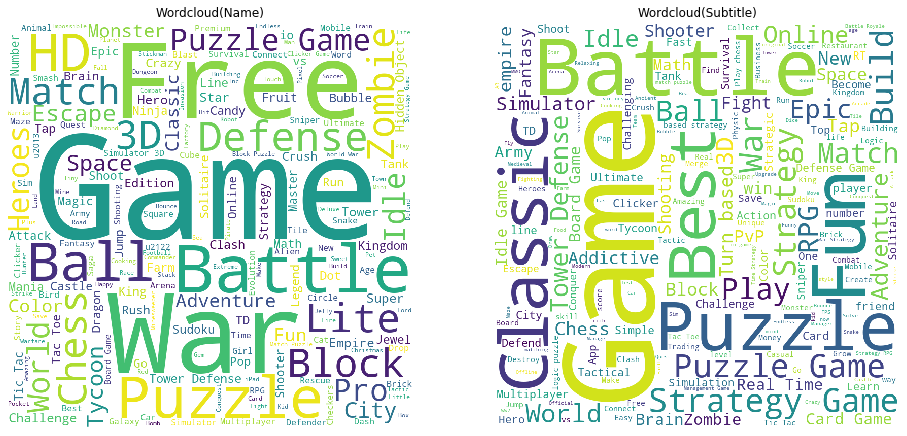

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(games['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(games['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

**Name-**
* `Game`,`War`,`Battle`,`Heroes`,`Idle`,`Puzzle`,`Defence`,`Tycoon`. 
    
**Subtitle-**
* `Game`,`War`,`Battle`,`Strategy`,`Build`,`Best`,`Fun`,`RPG`,`Epic`, `Play`.

# Conclusion - 

* Initially make the game `Free` to download and later charge with In-App Purchases. Common Pricing used for In-App 
    prices are `0.99` and `1.99`. 
    
* Make the Game with Age rating `9+` in mind, other choice is `4+`.

* Release the App in both the English and Chinese language or Market.

* To get into Top 10 developers either make very few Top Notch games like `Supercell` and `Tencent` did or create lots of small medium size games like `Vicky Patel` did. 

* Popular App categories are `Games`,`Strategy`,`Entertainment` and `Puzzle.`. Focusing on making Apps related to these categories are more beneficial. 
